In [0]:
#Import the libraries
import math
from sklearn.preprocessing import MinMaxScaler
import keras
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings 
warnings.filterwarnings('ignore') 


In [0]:

from google.colab import files
uploaded = files.upload()
df = pd.read_excel('AEL.N0000`N.xlsx')


df_dates = df.loc[:,'Date']
df_closes = df.loc[:,'Closed']

df.tail()

Saving AEL.N0000`N.xlsx to AEL.N0000`N (1).xlsx


,Date,Open,High,Low,Closed,% Chg.,Change,Prev. Closed,Volume,Turnover
1897,2020-03-10,16.5,16.5,14.5,15.1,-12.21,-2.1,17.2,3813579,57803019
1898,2020-03-11,15.1,15.8,15.1,15.4,2.67,0.4,15.0,5230899,79430307
1899,2020-03-12,15.1,15.1,14.6,15.0,-1.32,-0.2,15.2,1322960,19662739
1900,2020-03-13,14.8,15.1,14.0,15.0,0.00,0.0,15.0,1715778,24870935
1901,2020-03-20,14.0,14.0,12.3,13.3,-10.74,-1.6,14.9,1144255,14745297


In [0]:
#Get the number of columns and rows in the dataset
df.shape

(1902, 10)

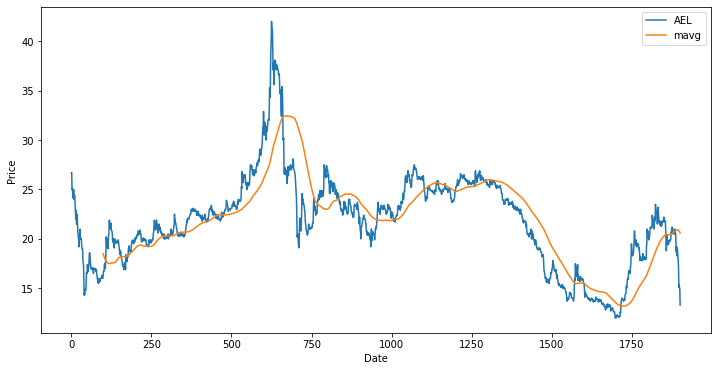

In [0]:

# Rolling mean
close_px = df['Closed']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='AEL')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [0]:
#Crete a new dataframe with only the 'Close column'
data = df.filter(['Closed'])
#Conver the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on(.80 means 80% of data )
training_data_len = math.ceil(len(dataset) * .80)
training_data_len

1522

In [0]:
#Creating the training data set
#Create the scaled training dat set

df_dates = df_dates.map(mdates.date2num)

train_data = dataset[0:training_data_len,:]
x_train = [] #Indipendent variable
y_train = [] #Dependent variable

for i in range(0,len(train_data)):
    x_train.append(df_dates[i])
    y_train.append(float(df_closes[i]))
    
x_test_svm = []
y_test_svm = []

for i in range(len(train_data),len(df_dates)):
    x_test_svm.append(df_dates[i])
    y_test_svm.append(float(df_closes[i]))



In [0]:
# Use sklearn support vector regression to predicit our data:
dates = np.array(x_train)
prices = np.array(y_train)
org_dates = np.array

#Convert to 1d Vector
dates = dates.reshape( -1, 1)
prices = prices.reshape( -1, 1)
print(dates)
print(prices)

def suportVectoRegression(x,y):
  #Create 3 support vector regression model
  svr_polynomial = SVR(kernel = 'poly', C=1e3, degree=2)
  svr_rbf =SVR(kernel='rbf', C=1e3,gamma=0.1)
          
  #Train the models

  svr_polynomial.fit(dates,prices)
  svr_rbf.fit(dates,prices)
          
          
  #Plot the model on the graph to see
  plt.figure(figsize = (12,6))
  plt.plot(df_dates, data, color= 'blue', label= 'Data')
  plt.plot(dates,svr_rbf.predict(dates),color='red', label='svr_rbf')
  plt.plot(x,svr_rbf.predict(x),color='green', label='svr_rbf')
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Close Price (Rs.)',fontsize=18)
  plt.legend()
  plt.show()

  print("Accuracy Poly:",svr_polynomial.score(x,y))
  print("Accuracy rbf:",svr_rbf.score(x,y))

  return svr_rbf.predict(x) 



[[734589.]
 [734589.]
 [734597.]
 ...
 [736919.]
 [736920.]
 [736921.]]
[[26.7]
 [26.7]
 [25. ]
 ...
 [15.8]
 [15.6]
 [15.4]]


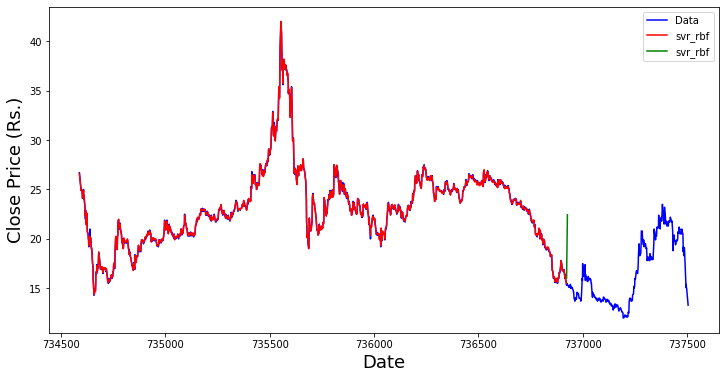

Accuracy Poly: -3.298188183981155e+18
Accuracy rbf: -2106.979747871162
Actual Values:  [[15.3], [15.5], [15.3]]
Predicted Values:  [16.03186141 17.66301495 22.4413261 ]


In [0]:
count = 0
#Predict the price on date
x_test_score = [[x_test_svm[count]],[x_test_svm[count+1]],[x_test_svm[count+2]]]
y_test_score = [[y_test_svm[count]],[y_test_svm[count+1]],[y_test_svm[count+2]]]

price_prediction = suportVectoRegression(x_test_score,y_test_score)
print("Actual Values: ",y_test_score)
print("Predicted Values: ",price_prediction)


#LSTM Model

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.49      ],
       [0.49      ],
       [0.43333333],
       ...,
       [0.1       ],
       [0.1       ],
       [0.04333333]])

In [0]:
numberOfdata = 60

#Creating the training data set
#Create the scaled training dat set
train_data =scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = [] #Indipendent variable
y_train = [] #Dependent variable

for i in range(numberOfdata,len(train_data)):
  x_train.append(train_data[i-numberOfdata:i,0])
  y_train.append(train_data[i,0])
  if i<= (numberOfdata+1):
    print(x_train)
    print(y_train)
    print()

[array([0.49      , 0.49      , 0.43333333, 0.43666667, 0.42666667,
       0.41666667, 0.40333333, 0.43333333, 0.4       , 0.4       ,
       0.41333333, 0.39666667, 0.37      , 0.35      , 0.33333333,
       0.36333333, 0.31666667, 0.31666667, 0.35      , 0.31666667,
       0.29      , 0.28333333, 0.26666667, 0.26666667, 0.24      ,
       0.27      , 0.26666667, 0.3       , 0.26666667, 0.27      ,
       0.26666667, 0.26666667, 0.25      , 0.23333333, 0.23333333,
       0.23333333, 0.2       , 0.18333333, 0.17666667, 0.13      ,
       0.07666667, 0.08333333, 0.08      , 0.09666667, 0.09333333,
       0.09333333, 0.11      , 0.15333333, 0.15333333, 0.15      ,
       0.18      , 0.17      , 0.15666667, 0.16666667, 0.17      ,
       0.18666667, 0.21666667, 0.22      , 0.21333333, 0.19      ])]
[0.18333333333333335]

[array([0.49      , 0.49      , 0.43333333, 0.43666667, 0.42666667,
       0.41666667, 0.40333333, 0.43333333, 0.4       , 0.4       ,
       0.41333333, 0.39666667, 0.37

In [0]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

Reshape the data: Reason for reshape the data is LSTM network requers 3 diamentional in the form of number of sample,number of time steps and number of features

In [0]:
#Reshape the data 
print(x_train.shape[0],' and ', x_train.shape[1],' are values of this array ', x_train.shape ,' 0 and 1 is the indexes of that array')
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

1462  and  60  are values of this array  (1462, 60)  0 and 1 is the indexes of that array


(1462, 60, 1)

In [0]:


#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1462/1462 [==============================] - 39s 27ms/step - loss: 0.0026


In [0]:
#Creating the testing data set
#Creating a new array containing scaled values of 20%
test_data =scaled_data[training_data_len - numberOfdata : ,:]
#Create the data sets x_test and y_test
x_test = [] 
y_test = dataset[training_data_len:,:]
for i in range(numberOfdata,len(test_data)):
  x_test.append(test_data[i-numberOfdata:i,0])


In [0]:
#Convert the data to anumpy array
x_test = np.array(x_test)


In [0]:
#Reshape the data
x_test.shape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5301125953071995

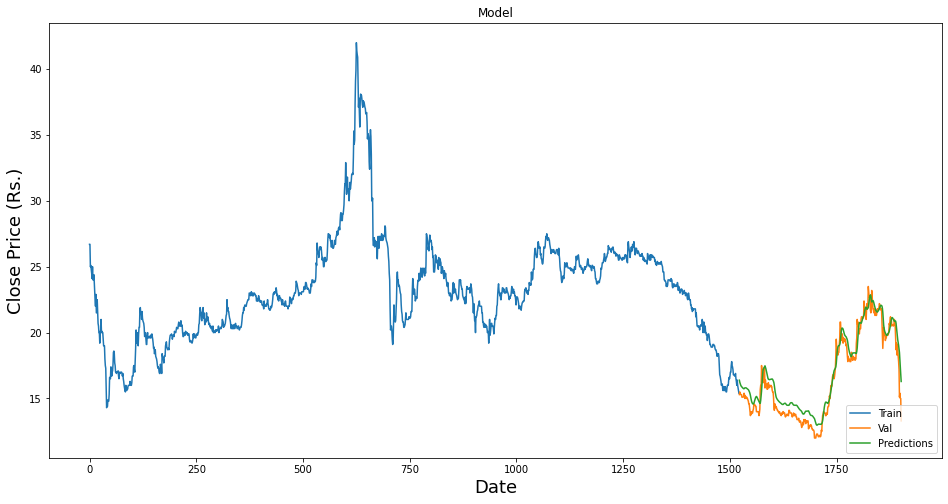

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (Rs.)',fontsize=18)
plt.plot(train['Closed'])
plt.plot(valid[['Closed','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [0]:
valid

,Closed,Predictions
1522,15.3,16.388086
1523,15.5,16.233717
1524,15.3,16.124027
1525,15.3,16.029692
1526,15.3,15.956978
...,...,...
1897,15.1,18.492697
1898,15.4,17.936314
1899,15.0,17.352646
1900,15.0,16.780981
